### Degree distribution: unweighted vs. weighted

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import networkx as nx
import pandas as pd
import powerlaw

In [2]:
def makeNetworkFromFiles(fedges, fnodes,delimiter):
    ''' Generate a network from csv files.
    The first column of the nodes file is taken to be the id by default.
    The nodes file must contain columns named weight, source, and target.
    The delimiter parameter is the delimeter of the file. 
    This returns an undirected graph.
    '''
    G = nx.Graph()
    fn=pd.read_csv(fnodes,delimiter=delimiter,index_col=0).transpose()
    n_attr=len(fn.index.values)
    attr=fn.index.values
    for n in fn.columns:
        attr_node=dict(zip(attr, fn[n].values))
        G.add_node(n,attr_dic=attr_node)
    fl=pd.read_csv(fedges,delimiter=delimiter)
    fl.columns = map(str.lower, fl.columns)
    for L in fl.index.values:
        G.add_edge(fl['source'][L],fl['target'][L],weight=fl['weight'][L])
    GL = max(nx.connected_component_subgraphs(G), key=len)
    return GL

In [3]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

In [4]:
G= makeNetworkFromFiles('Air_Data [Edges].csv', 'Air_Data [Nodes].csv',',')# csv is comma-delimited
k= dict(G.degree()).values()
k_weighted = dict(G.degree(weight='weight')).values()

In [5]:
# make sure that k_min is greater than 0 (otherwise log plots would be impossible)
print 'k min = ',(min(k))

k min =  1


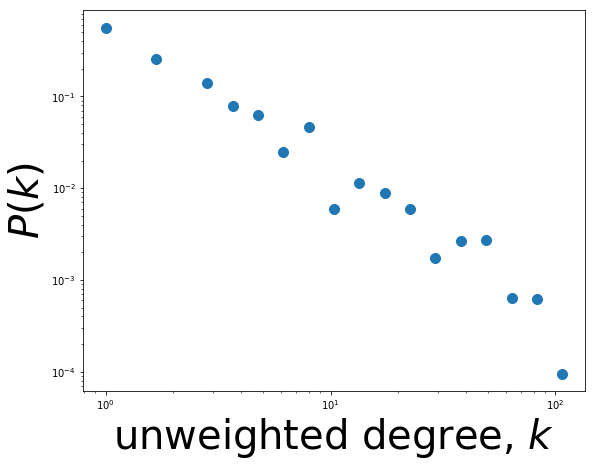

In [6]:
# unweighted degree

fig, ax = plt.subplots()
fig.set_size_inches((9, 7))

n_bins = 20

k_logBins = np.logspace(np.log10(min(k)), np.log10(max(k)),num=n_bins)
k_logBinDensity, k_binedges = np.histogram(k, bins=k_logBins, density=True)

ax.loglog(k_logBins[:-1],k_logBinDensity,'o', markersize=10)

ax.set_xlabel('unweighted degree, $k$',fontsize=40)
ax.set_ylabel('$P(k)$',fontsize=40) 
#plt.savefig("unweighted.png",dpi=200,bbox_inches='tight')
plt.show()

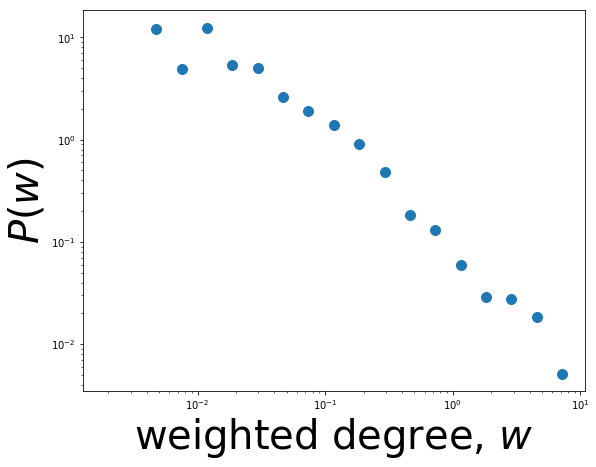

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches((9, 7))

n_bins = 20

k_logBins = np.logspace(np.log10(min(k_weighted)+0.001), np.log10(max(k_weighted)),num=n_bins)
k_logBinDensity, k_binedges = np.histogram(k_weighted, bins=k_logBins, density=True)


ax.loglog(k_logBins[:-1],k_logBinDensity,'o', markersize=10)

ax.set_xlabel('weighted degree, $w$',fontsize=40)
ax.set_ylabel('$P(w)$',fontsize=40) 
#plt.savefig("weighted.png",dpi=200,bbox_inches='tight')
plt.show()

### Fitting a powerlaw using *powerlaw*

In [13]:
fit=powerlaw.Fit(k,discrete=True)
#fit=powerlaw.Fit(k,xmin=min(k),discrete=True) # specifying k_min -- optional.

Calculating best minimal value for power law fit


In [14]:
print 'alpha =',fit.power_law.alpha   #exponent of the power law
print 'standard error =',fit.power_law.sigma  #standard error oof the fit
print 'xmin =',fit.xmin #xmin
alpha = fit.power_law.alpha; xmin = fit.xmin
print 'C =',(alpha - 1)*xmin**(alpha-1)

alpha = 1.81830515572
standard error = 0.0631336134094
xmin = 5.0
C = 3.05411963917


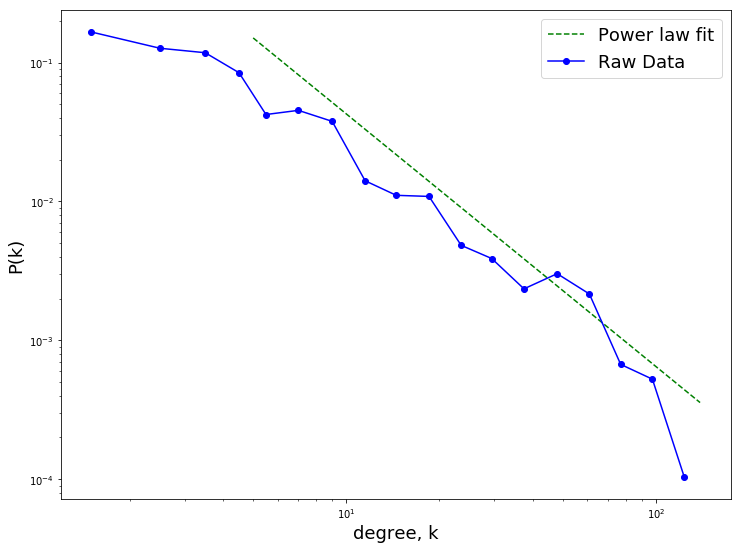

In [15]:
plt.figure(figsize=(12,9))
fit.power_law.plot_pdf(color='g',linestyle='--',label='Power law fit')
powerlaw.plot_pdf(k,color ='b',marker= 'o',label='Raw Data')
plt.ylabel('P(k)',fontsize=18)
plt.xlabel('degree, k',fontsize=18)
plt.legend(loc='best',fontsize=18)
plt.show()

### Calculating properties of the distribution

In [16]:
# from actual network
print 'k_max =' ,max(k)
print '<k> =',np.mean(k)
print 'k_std =',np.std(k)
print '<C> =',nx.average_clustering(G)
print '<L> =' ,nx.average_shortest_path_length(G)

k_max = 139
<k> = 12.8072289157
k_std = 20.1031723393
<C> = 0.625217249163
<L> = 2.73812470426


In [17]:
# analytical values, based on the fit (value of alpha) and expressions for scale-free networks
import scipy.integrate as integrate
from math import *
N = G.number_of_nodes() 

# use k_min given by the fit, then calculate k_max and C
xmin = fit.xmin
xmax = xmin*N**(1/(alpha-1))
C = (alpha - 1)*xmin**(alpha-1)

k_mean = integrate.quad(lambda x: x*C*x**(-1*alpha), xmin, xmax)[0] # compute the integral for the expected value of k
try:
    k_std = (integrate.quad(lambda x: x**2*C*x**(-1*alpha), xmin, xmax)[0] - k_mean**2)**0.5 # compute the second moment
except: k_std = 'cannot compute due to divergent moment'
CC_avg = log(N)**2 / N
L_avg = log(N)/log(log(N))

print 'k_max =' ,xmax
print '<k> =', k_mean
print 'k_std =',k_std
print '<C> ~',CC_avg
print '<L> ~' ,L_avg

k_max = 6024.16083867
<k> = 59.2018594537
k_std = 268.6492918
<C> ~ 0.101504795203
<L> ~ 3.30072979019
